# <center><span style="font-family: Arial; font-weight:bold;font-size:2.4em;color:#1F497D;">Project - Unsupervised Learning</center>

### Library packages version:

    numpy - 1.23.5
    pandas - 2.0.3
    scikit-learn - 1.2.2
    scipy - 1.11.1
    seaborn - 0.12.2
    matplotlib - 3.7.2
    matplotlib-inline - 0.1.6
    statsmodels - 0.14.0

### Importing all necessary libraries

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import zscore
from scipy.spatial.distance import cdist

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection  import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# <center><span style="font-family: Arial; font-weight:bold;font-size:2.1em;color:#FF4040">PART - 1</center>

## Project & Data Information

<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#666666"> `DOMAIN`: Automobile

<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#666666"> `CONTEXT`: The data concerns city-cycle fuel consumption in miles per gallon to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.
    
<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#666666"> `DATA DESCRIPTION`:  
    
1. `cylinders`: multi-valued discrete
2. `acceleration`: continuous
3. `displacement`: continuous
4. `model year`: multi-valued discrete
5. `horsepower`: continuous
6. `origin`: multi-valued discrete
7. `weight`: continuous
8. `car name`: string (unique for each instance)
9. `mpg`: continuous    
    
<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#666666"> `PROJECT OBJECTIVE`: To understand K-means Clustering by applying on the Car Dataset to segment the cars into various categories.    

### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:#B7410E;">1. Data Understanding & Exploration

### 1.1 a - Read ‘Car name.csv’ as a DataFrame and assign it to a variable.

In [2]:
d1 = pd.read_csv("Car name.csv")

In [3]:
d1.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


### 1.1 b - Read ‘Car-Attributes.json as a DataFrame and assign it to a variable.

In [4]:
d2 = pd.read_json("Car-Attributes.json")

In [5]:
d2.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


### 1.1 c - Merge both the DataFrames together to form a single DataFrame.

In [6]:
df = pd.concat([d1,d2],axis=1)

In [7]:
df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


We can see that both the dataframes have been merged.

### 1.1 d - Print 5 point summary of the numerical features and share insights.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


### Observations -

* `mpg (Miles per Gallon)`:
The average (mean) miles per gallon is approximately 23.51, indicating that the average car in the dataset gets about 23.51 miles per gallon.
The standard deviation is 7.82, which means there is some variability in fuel efficiency among the cars.
The minimum mpg value is 9.0, while the maximum is 46.6.
25% of the cars have an mpg value of 17.5 or lower, and 75% have an mpg value of 29.0 or lower.
* `cyl (Cylinders)`:
The average number of cylinders is approximately 5.45.
The standard deviation is 1.70, indicating some variability in the number of cylinders.
The minimum number of cylinders is 3, while the maximum is 8.
50% of the cars have 4 cylinders, and 25% have 3 cylinders or fewer, while 75% have 8 cylinders or fewer.
* `disp (Displacement)`:
The average displacement is approximately 193.43.
The standard deviation is 104.27, indicating a wide variability in engine displacement.
The minimum displacement is 68, while the maximum is 455.
50% of the cars have a displacement of 148.5 or lower.
* `wt (Weight)`:
The average weight is approximately 2970.42 pounds.
The standard deviation is 846.84, indicating a wide range of weights among the cars.
The minimum weight is 1613 pounds, while the maximum is 5140 pounds.
50% of the cars have a weight of 2803.5 pounds or lower.
* `acc (Acceleration)`:
The average acceleration is approximately 15.57 seconds.
The standard deviation is 2.76, indicating some variability in acceleration times.
The minimum acceleration time is 8.0 seconds, while the maximum is 24.8 seconds.
25% of the cars have an acceleration time of 13.83 seconds or lower, while 75% have an acceleration time of 17.18 seconds or lower.
* `yr (Year)`:
The average year is approximately 76.01, which corresponds to around 1976.
The standard deviation is 3.70, indicating some variability in the years.
The minimum year is 70 (indicating 1970), while the maximum is 82 (indicating 1982).
The majority of the cars in the dataset were manufactured between 1973 and 1979.
* `origin (Origin)`:
The average origin value is approximately 1.57.
The standard deviation is 0.80, indicating variability in origin values.
The minimum origin value is 1, while the maximum is 3.
The majority of the cars in the dataset have an origin value of 1, which might correspond to a specific region or country.

### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:#B7410E;">2. Data Preparation & Analysis

### 1.2 a - Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach.

In [11]:
null_percentage = (df.isnull().sum() / len(df)) * 100

# Print the feature-wise percentage of null values
print(null_percentage)

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64


We observe that there are no null/missing values in the dataset.

### 1.2 b - Check for duplicate values in the data and impute with the best suitable approach. 

In [12]:
# Check for the duplicated entries
df.duplicated().sum()

0

We can notice that dataset is free of duplicacy.

### 1.2 c - Plot a pairplot for all features.

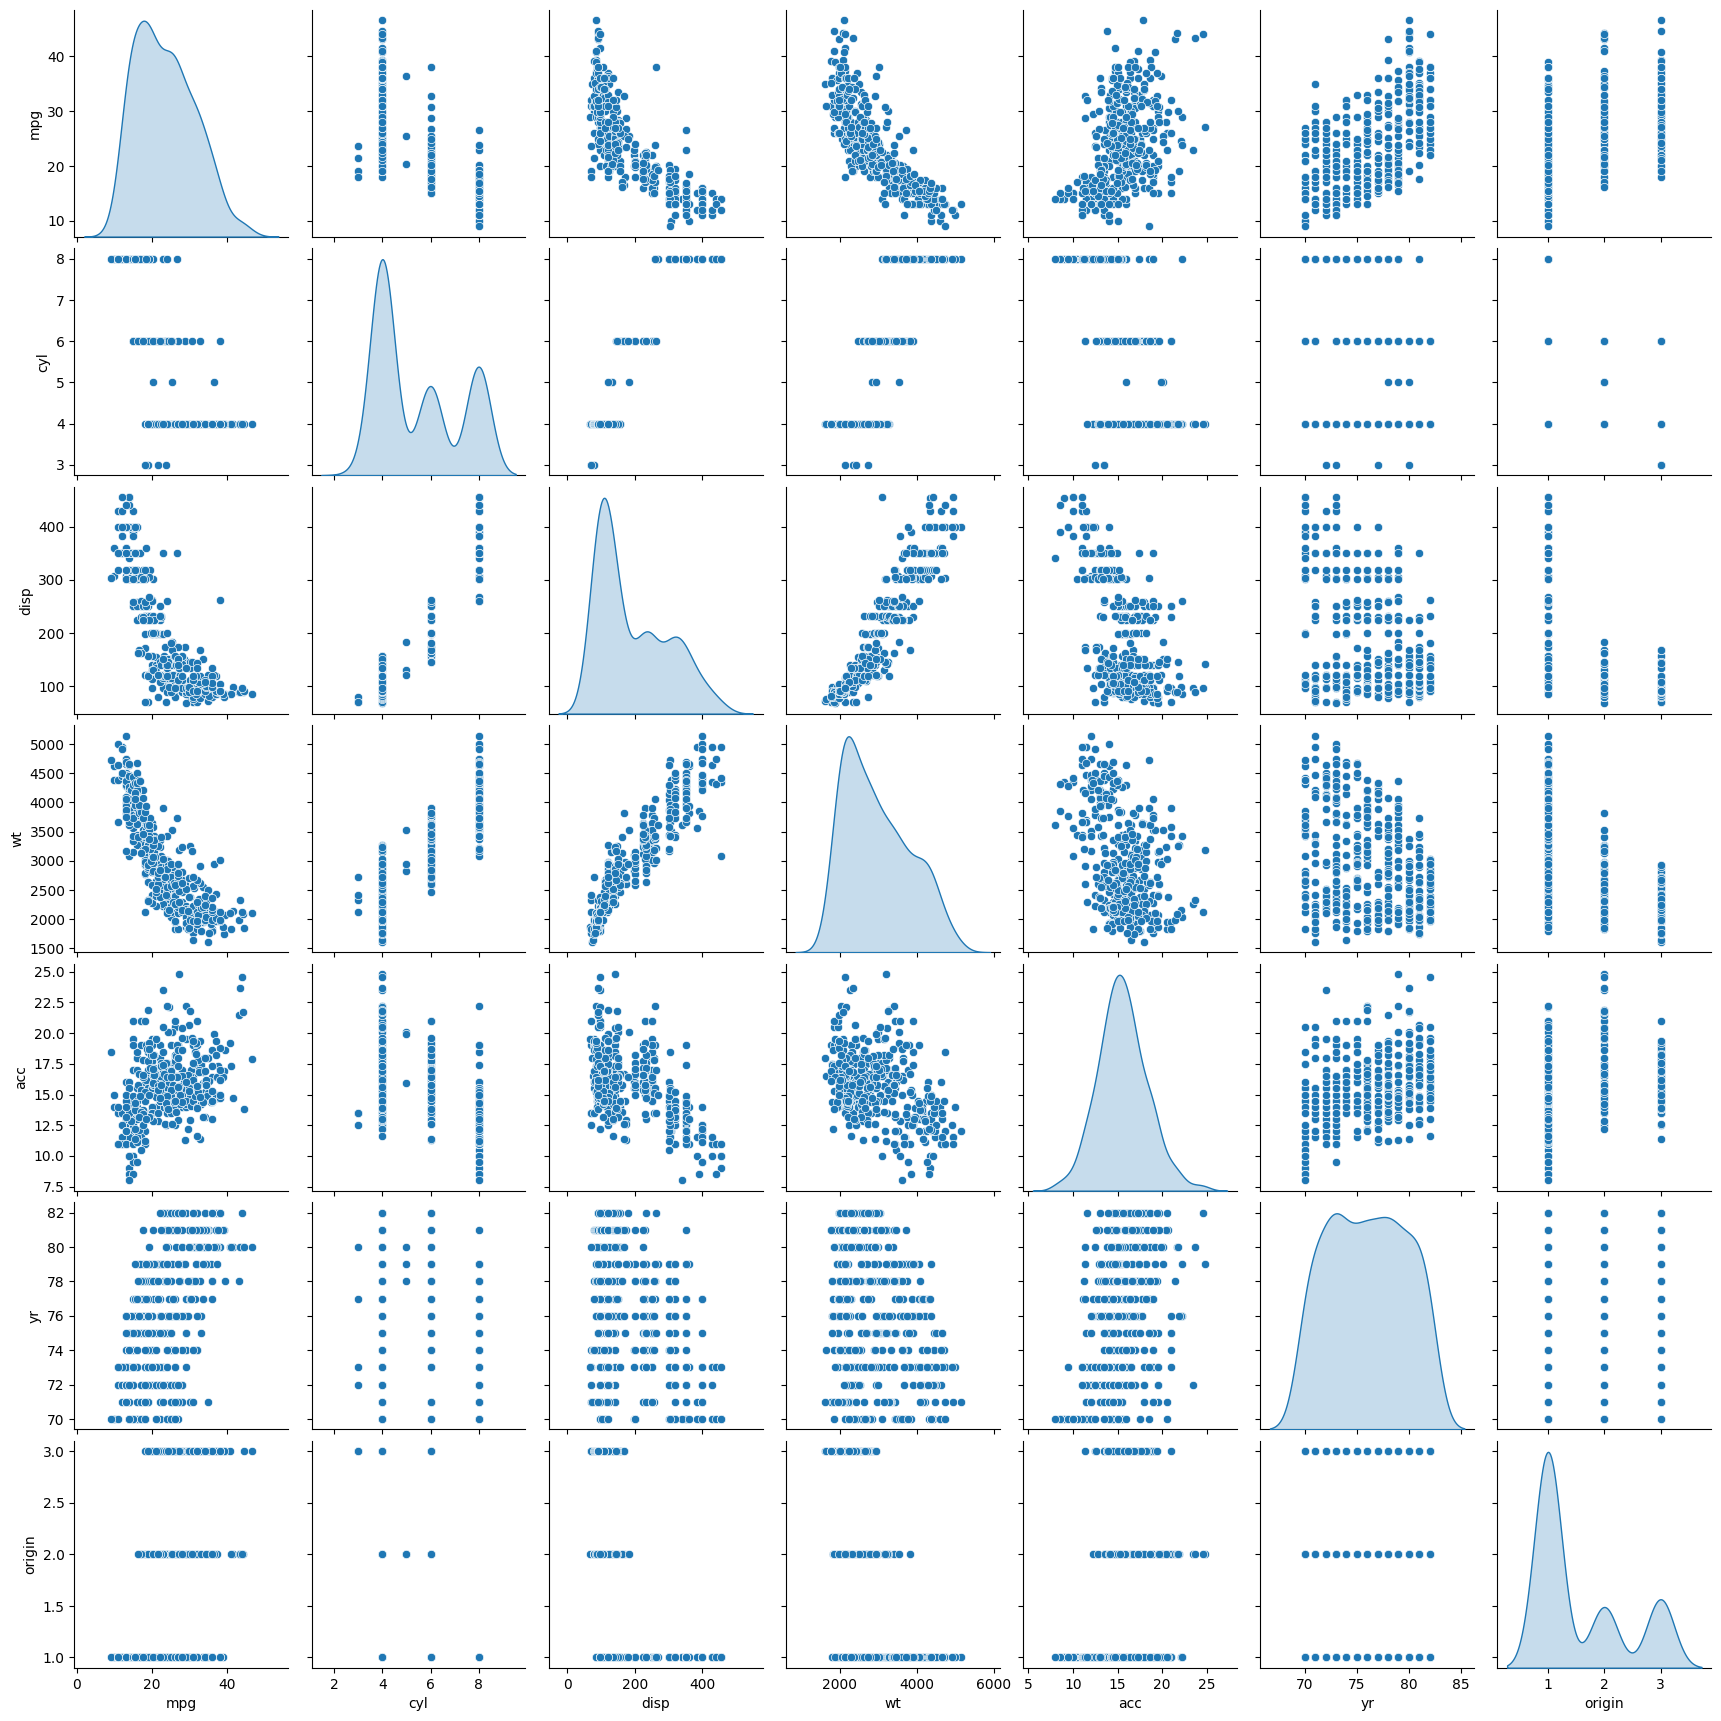

In [13]:
warnings.filterwarnings("ignore")

# Creating the pairplot
sns.pairplot(df, diag_kind="kde");

### Observations -

#### 1. `Strong Correlation Patterns`:
* The variable 'mpg' (miles per gallon) has a negative correlation with variables like 'cyl' (number of cylinders), 'disp' (displacement), 'hp' (horsepower), 'wt' (weight), and 'acc' (acceleration). This suggests that as 'mpg' increases, these other variables tend to decrease.
* Variables like 'cyl', 'disp', 'hp', and 'wt' have positive correlations among themselves, indicating that larger engine specifications (cylinders, displacement, horsepower, and weight) are often found together.
#### 2. `Weight and Size Influence`:
* 'wt' (weight) has a relatively strong negative correlation with 'mpg' (miles per gallon), indicating that heavier vehicles tend to have lower fuel efficiency.
* 'wt' also shows positive correlations with other variables like 'cyl', 'disp', and 'hp', further indicating that larger and heavier vehicles tend to have more powerful engines.
#### 3. `Acceleration and Size Influence`:
* 'acc' (acceleration) has a moderate positive correlation with 'yr' (year), suggesting that newer vehicles tend to have better acceleration.
* 'acc' has a weak negative correlation with 'wt', implying that lighter vehicles might have better acceleration.
#### 4. `Time and Design Changes`:
* 'yr' (year) has a positive correlation with 'mpg', indicating that vehicles over time tend to have improved fuel efficiency.
* 'yr' also has a positive correlation with 'acc', suggesting that newer vehicles might have better acceleration.
#### 5. `Engine Power Relationships`:
'hp' (horsepower) has positive correlations with other engine-related variables like 'cyl', 'disp', and 'wt'. This highlights the connection between engine power and engine size or weight.
#### 6. `Country of Origin Influence`:
'origin' shows positive correlations with 'yr' and 'acc', possibly suggesting that vehicles from different origins might have varying trends in terms of design changes and acceleration.

### 1.2 d - Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’.
### 1.2 e - Share insights for Q2.d.

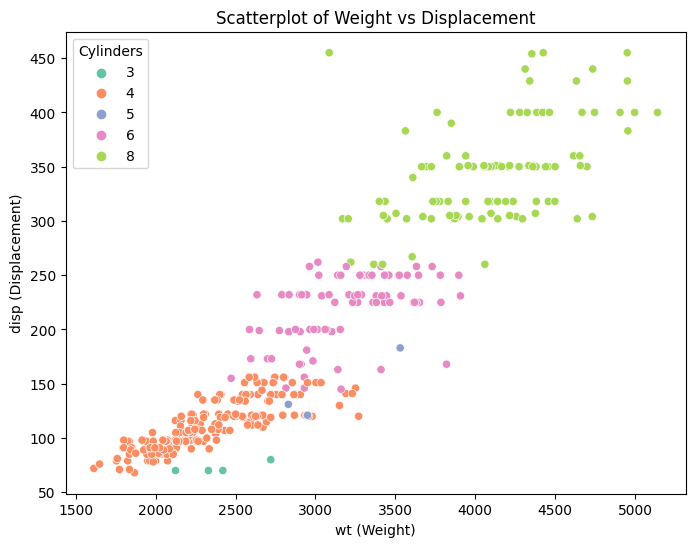

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='wt', y='disp', hue='cyl', data=df, palette='Set2')
plt.xlabel('wt (Weight)')
plt.ylabel('disp (Displacement)')
plt.title('Scatterplot of Weight vs Displacement')
plt.legend(title='Cylinders');

### Observations - 

* We observe that there is a very strong positive correlation between `wt` and `disp` suggests that heavier cars tend to have larger displacements, and vice versa.
* There seems to be a strong positive correlation of columns `wt` and `disp` with `cyl`. This means that cars with more cylinders tend to be heavier and also cars with more cylinders tend to have larger displacements. 

In summary, larger and heavier cars tend to have more cylinders and larger displacements.

### 1.2 f - Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’.
### 1.2 g - Share insights for Q2.f.

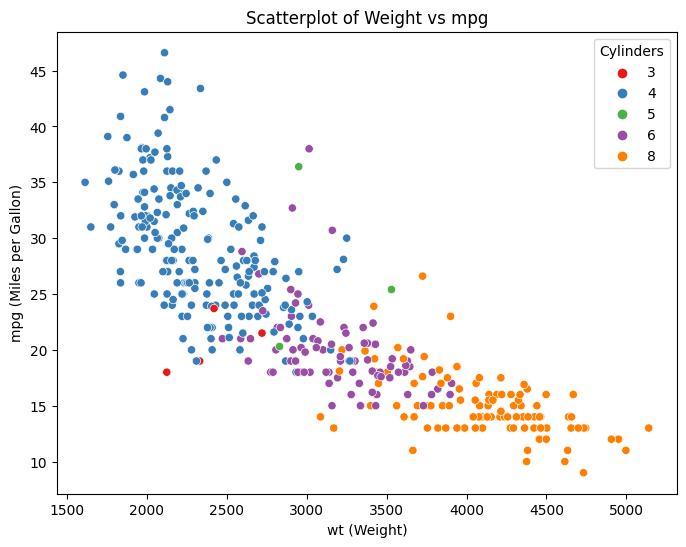

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='wt', y='mpg', hue='cyl', data=df, palette='Set1')
plt.xlabel('wt (Weight)')
plt.ylabel('mpg (Miles per Gallon)')
plt.title('Scatterplot of Weight vs mpg')
plt.legend(title='Cylinders');

### Observations -

* We observe that there is a very strong negetive correlation between columns `wt` and `mpg` indicating that heavier cars tend to have lower miles per gallon.
* There is a strong positive correlation between the weight ('wt') of a car and its number of cylinders ('cyl'), as well as a strong negative correlation between the number of cylinders ('cyl') and miles per gallon ('mpg'). This suggests that cars with more cylinders tend to be heavier and have lower fuel efficiency.


### 1.2 h - Check for unexpected values in all the features and datapoints with such values.

Let's first look at the the basic information about the dataset.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


### Insights -

* The dataset contains 9 columns.
* The columns include a mix of data types: object (categorical), float64 (floating-point numbers), and int64 (integers).
* The 'car_name', 'hp', 'cyl', 'yr', and 'origin' columns have categorical or discrete data, while 'mpg', 'disp', 'wt', and 'acc' columns have numerical data.
* There are no missing values in any of the columns. Each column has 398 non-null entries.
* Categorical columns include 'car_name', 'hp', 'cyl', 'yr', and 'origin'. These columns likely represent categories, car names, years, and country of origin.
* Numerical columns include 'mpg', 'disp', 'wt', and 'acc'. These columns likely represent various attributes of the cars, such as fuel efficiency, displacement, weight, and acceleration.
* The 'hp' column is of data type object, which suggests that there might be non-numeric or formatted values in this column. It's possible that the 'hp' column contains some unexpected data that needs further investigation and cleaning.

##### Let's now look at the unique values in the column 'hp' to identify the unexpected values.

In [15]:
df['hp'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

We can see that there are mixed data type values in the column like '?' which should actually be read as missing values (NaN).

Therefore, let's replace such data points in the column with null value.

In [16]:
df['hp'] = df['hp'].replace(['?'],np.nan)
df['hp'] = df['hp'].astype(float)

In [17]:
df.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

As we can see that dataype of column 'hp' is now changed to float as the unexpected values have been replaced by NaN.

Let us now look ath the percentage of null values in the column.

In [18]:
pd.DataFrame({'Count':df.isnull().sum()[df.isnull().sum()>0],'Percentage':(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*10})

,Count,Percentage
hp,6,0.150754


Since percentage of missing values is quite insignificant, therefore we can drop these columns with missing 'hp' values. 

In [19]:
df.dropna(subset=['hp'], inplace=True)

In [20]:
df.shape

(392, 9)

Hence respective rows have been dropped from the dataset.

### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:#B7410E;">3. Clustering

### 1.3 a - Apply K-Means clustering for 2 to 10 clusters.

Before performing KMeans Clustering let's first drop columns 'car_name' and store it in new variable and then scale the new dataset using zscore.

In [21]:
df_new = df.drop('car_name', axis=1)

In [22]:
df_scaled = df_new.apply(zscore)
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,1.450087e-16,1.001278,-1.853218,-0.826925,-0.089277,0.712514,2.970359
cyl,392.0,-1.087565e-16,1.001278,-1.451004,-0.864014,-0.864014,1.483947,1.483947
disp,392.0,-7.250436e-17,1.001278,-1.209563,-0.855532,-0.415384,0.778276,2.493416
hp,392.0,-1.812609e-16,1.001278,-1.520975,-0.766593,-0.285349,0.560080,3.265452
wt,392.0,-1.812609e-17,1.001278,-1.608575,-0.886854,-0.205211,0.751093,2.549061
acc,392.0,4.350262e-16,1.001278,-2.736983,-0.641055,-0.014999,0.538471,3.360262
yr,392.0,-1.160070e-15,1.001278,-1.625315,-0.809884,0.005547,0.820978,1.636410
origin,392.0,1.359457e-16,1.001278,-0.716641,-0.716641,-0.716641,0.526382,1.769406


Hence dataset have been scaled and is now ready for Clustering.

### 1.3 a - Apply K-Means clustering for 2 to 10 clusters.

In [24]:
warnings.filterwarnings('ignore')
k_values=range(2,11)
inertia_values=[]

for k in k_values:
    model=KMeans(n_clusters=k)
    model.fit(df_scaled)
    prediction=model.predict(df_scaled)
    inertia_values.append(sum(np.min(cdist(df_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / df_scaled.shape[0])

### 1.3 b - Plot a visual and find elbow point

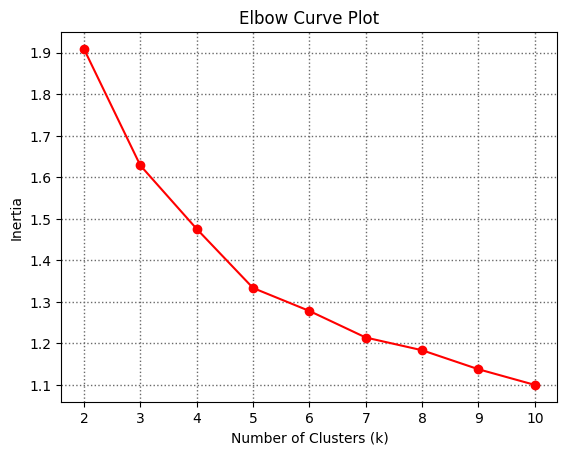

In [25]:
plt.plot(k_values, inertia_values, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve Plot')
plt.style.use('default')
plt.grid(ls = 'dotted',c = 'dimgray',lw = 1)

### 1.3 c - On the above visual, highlight which are the possible Elbow points.

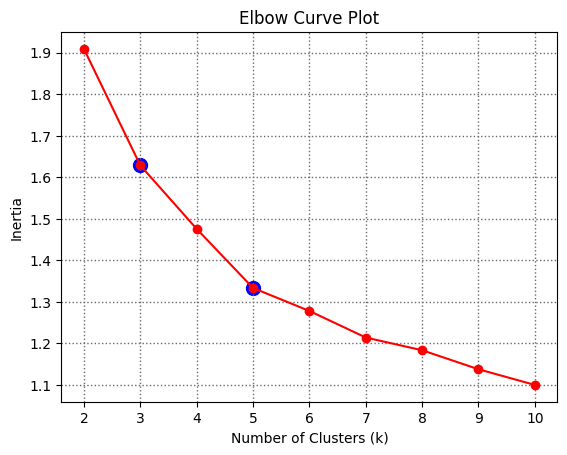

In [26]:
plt.plot(k_values, inertia_values, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve Plot')
plt.style.use('default')
plt.grid(ls='dotted', c='dimgray', lw=1)

# Indices of the elbow points based on your analysis
elbow_indices = [1, 3]

# Plot the elbow points using scatter
plt.scatter([k_values[idx] for idx in elbow_indices], [inertia_values[idx] for idx in elbow_indices],
            c='blue', marker='o', s=100)

plt.show()


#### Possible Elbow points from above plot - (Highlighted with blue mark)

1. `For k=3`:

* One of the potential elbow points on the elbow curve is observed at k=3.
* At this point, the inertia starts to decrease at a slower rate, indicating a possible optimal number of clusters.
* Choosing k=3 strikes a balance between capturing meaningful patterns in the data and avoiding overfitting.

2. `For k=5`:

* Another potential elbow point on the elbow curve is identified at k=5.
* The inertia reduction rate slows down at this point, suggesting a possible optimal cluster count.
* Selecting k=5 allows us to explore more nuanced patterns while still maintaining a manageable number of clusters.

Comparing both the points K=5 seems to be the most optimal elbow point for the number of clusters because rate at which the inertia drops after this point is much slower than rate at which inertia drops after point k=3.

### 1.3 d - Train a K-means clustering model once again on the optimal number of clusters.

In [27]:
opt_model=KMeans(5) # Since 5 seemed to be the most optimal.
opt_model.fit(df_scaled)
prediction=opt_model.predict(df_scaled)

### 1.3 e - Add a new feature in the DataFrame which will have labels based upon cluster value.

In [28]:
#Append the prediction 
df["Cluster"] = prediction
df_scaled["Cluster"] = prediction
print("Groups Assigned :")
df.sample(10)

Groups Assigned :


,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,Cluster
335,triumph tr7 coupe,35.0,4,122.0,88.0,2500,15.1,80,2,3
143,opel manta,26.0,4,97.0,78.0,2300,14.5,74,2,0
109,chevrolet vega,21.0,4,140.0,72.0,2401,19.5,73,1,0
240,volkswagen dasher,30.5,4,97.0,78.0,2190,14.1,77,2,0
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,1
9,amc ambassador dpl,15.0,8,390.0,190.0,3850,8.5,70,1,1
104,ford country,12.0,8,400.0,167.0,4906,12.5,73,1,1
60,chevrolet vega,20.0,4,140.0,90.0,2408,19.5,72,1,0
217,buick opel isuzu deluxe,30.0,4,111.0,80.0,2155,14.8,77,1,4
76,volvo 145e (sw),18.0,4,121.0,112.0,2933,14.5,72,2,0


We can see that groups have been assigned to the respective datapoints. 

### 1.3 f - Plot a visual and color the datapoints based upon clusters.

Let's visualize the datapoints based upon clusters they are assigned to with the help of pairplot which can give us the insights on how how effectively clustering is done by the model.

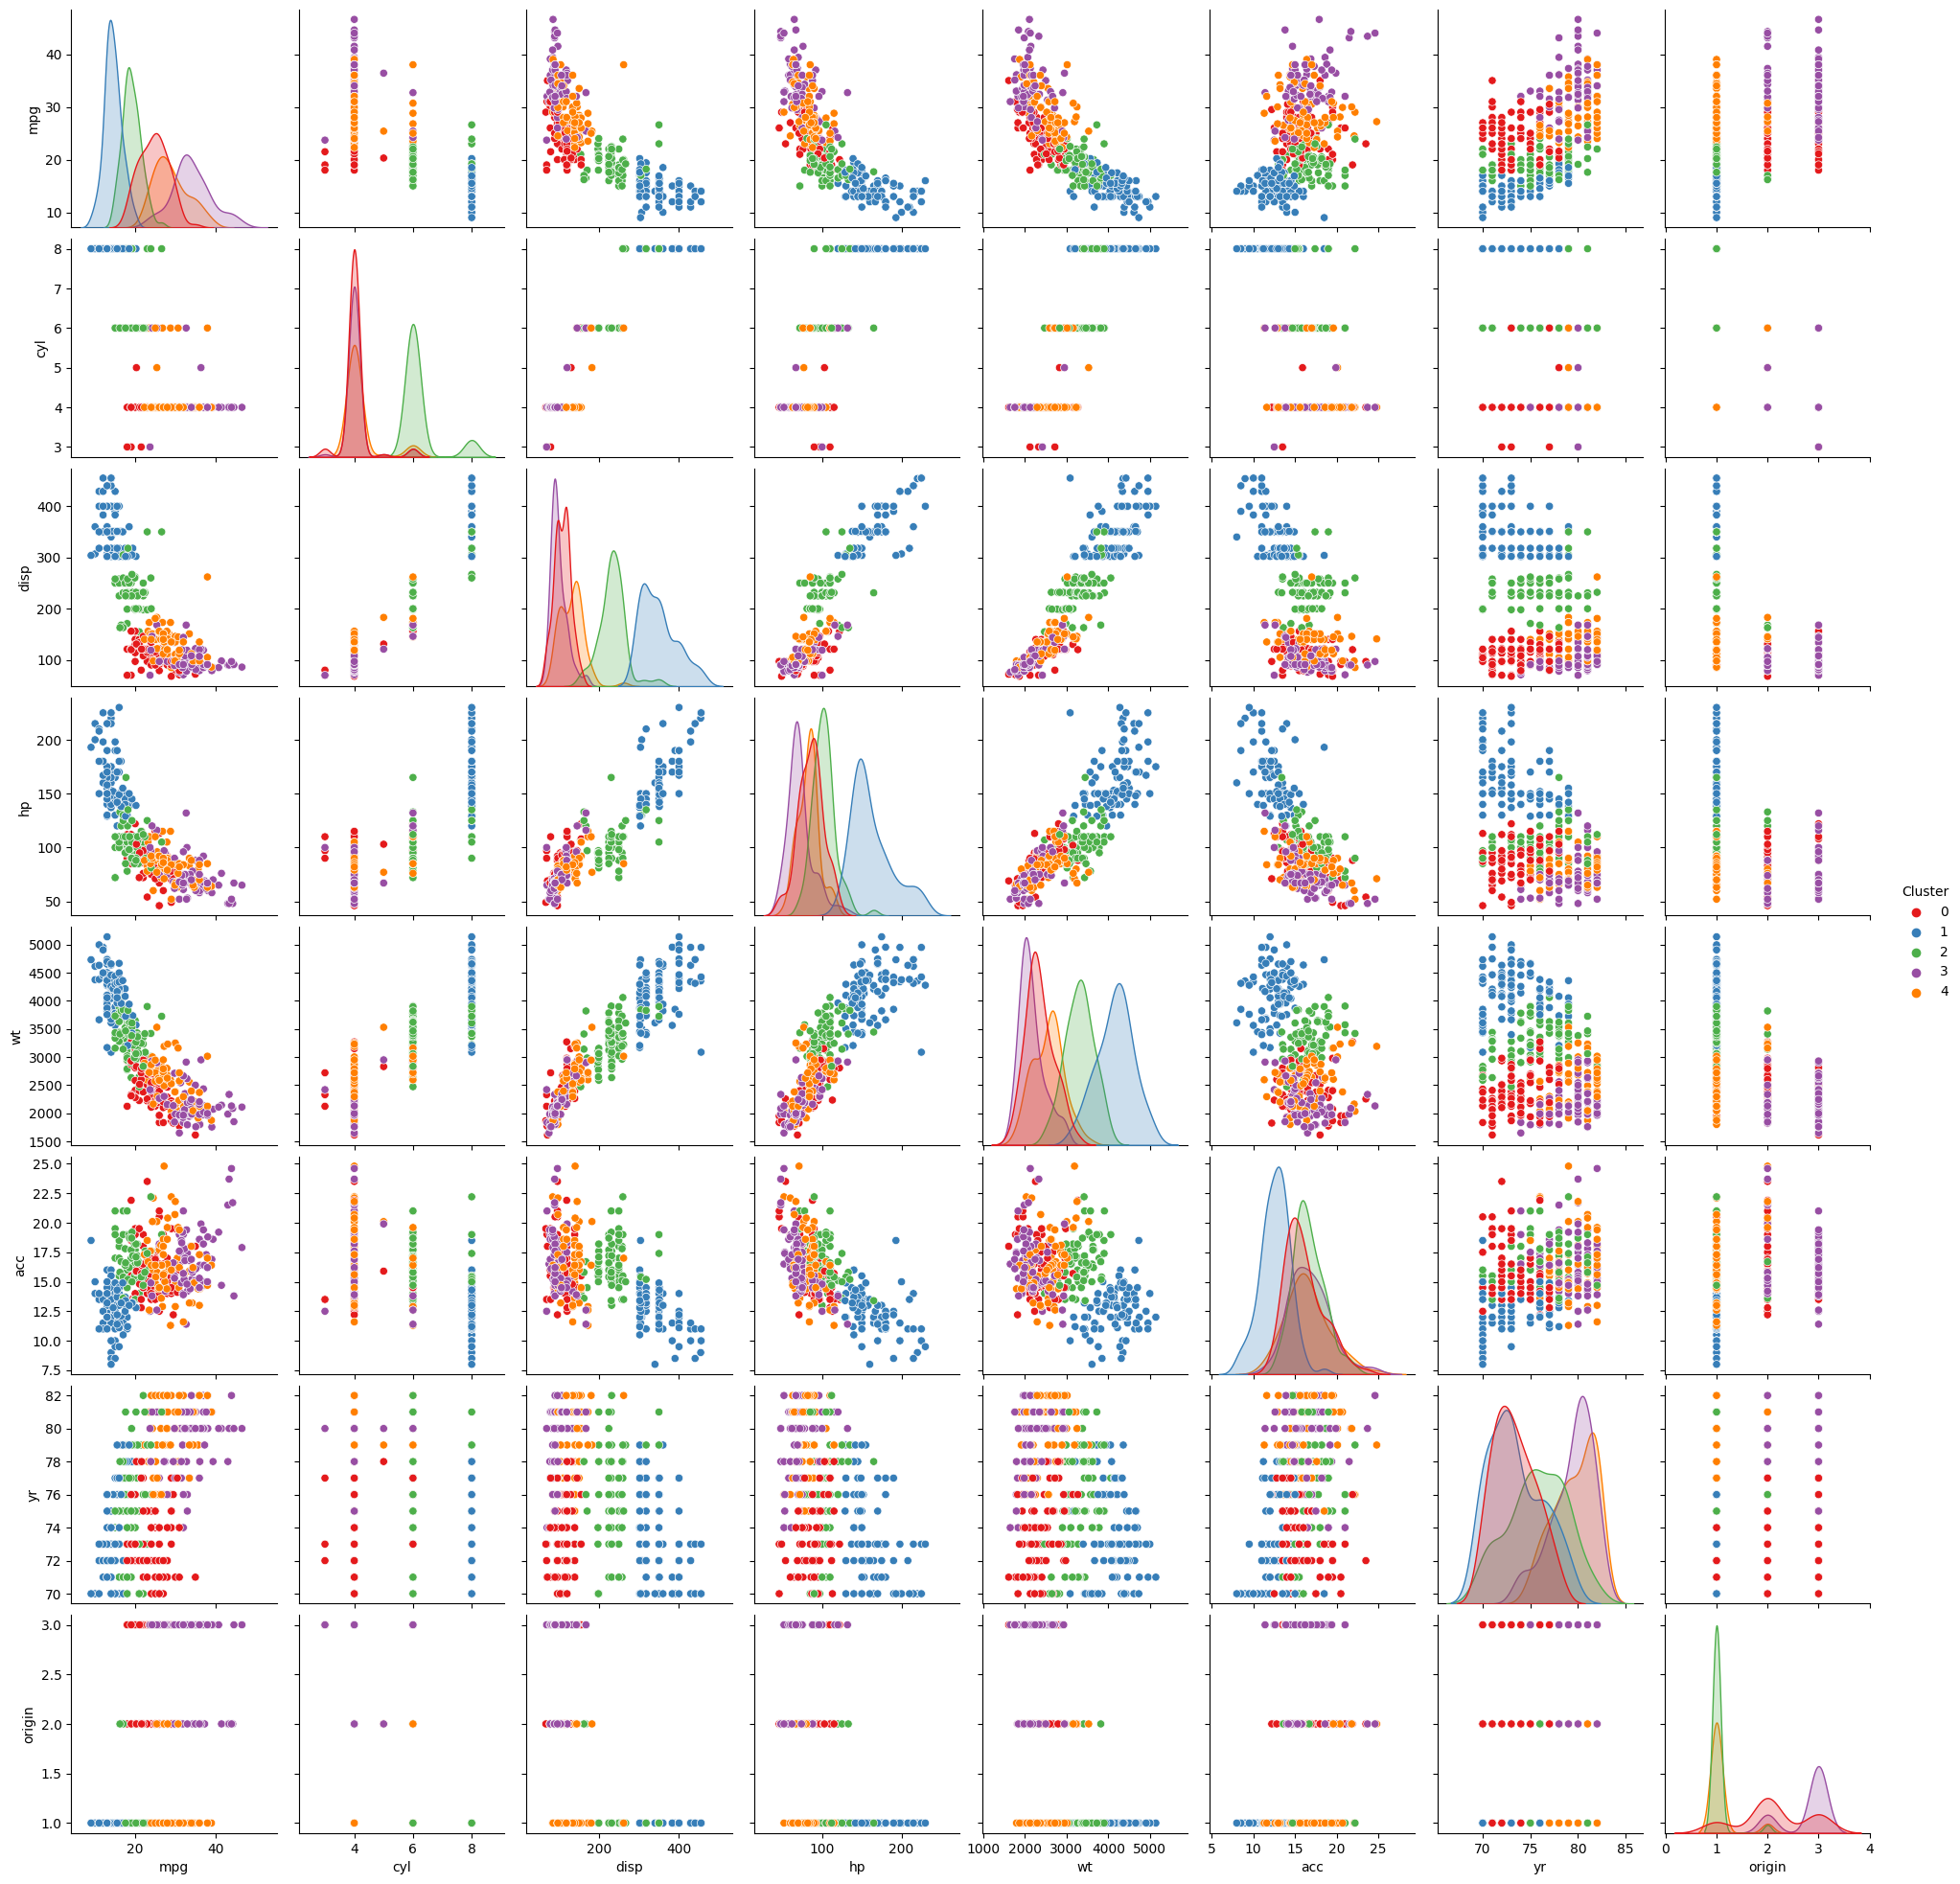

In [29]:
warnings.filterwarnings("ignore")

sns.pairplot(df, diag_kind="kde", hue='Cluster', palette='Set1');

### 1.3 g - Pass a new DataPoint and predict which cluster it belongs to.

In [31]:
# Create a synthetic data point 
new_data = {'mpg': 27.6, 'cyl': 4, 'disp': 118.0, 'hp': 87.0, 'wt': 2600, 'acc': 18.5, 'yr': 80, 'origin': 1}  # Replace with your features and values

# Convert to DataFrame
new_df = pd.DataFrame([new_data])

# Scale the synthetic data point using the same scaling parameters as before
scaled_new_df = (new_df - df_new.mean()) / df_new.std()

# Train K-means clustering model with the optimal number of clusters
colms = ['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin']
kmeans = KMeans(n_clusters=5, random_state=1)
df['cluster'] = kmeans.fit_predict(df_scaled[colms]) 

# Predict the cluster for the synthetic data point
predicted_cluster = kmeans.predict(scaled_new_df[colms])

print("Predicted Cluster:", predicted_cluster[0])

Predicted Cluster: 3


Therefore the new synthetic data has been assigned Cluster/group 3.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#000000;">***********************************************************************************************************************

# <center><span style="font-family: Arial; font-weight:bold;font-size:2.1em;color:#FF4040">PART - 2</center>

## Project & Data Information



<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#666666"> `DOMAIN`: Automobile
    
<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#666666"> `CONTEXT`: The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
    
<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#666666"> `DATA DESCRIPTION`: The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars. All the features are numeric i.e. geometric features extracted from the silhouette.
    
<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#666666"> `DATA DICTIONARY`:    
    
1. `compactness`: Compactness of the vehicle shape (ratio of perimeter^2 to area).
2. `circularity`: Circularity of the vehicle shape (4piarea/perimeter^2).
3. `distance_circularity`: average distance of the border points from the center.
4. `radius_ratio`: Ratio of the maximum length of the vehicle to its radius.
5. `pr.axis_aspect_ratio`: Ratio of the major axis length to the minor axis length.
6. `max.length_aspect_ratio`: Ratio of the length of the longest line segment in the vehicle to the minor axis length.
7. `scatter_ratio`: the ratio of the average distance from the center to the points on the perimeter to the distance from the center to the farthest point.
8. `elongatedness`: ratio of the length of the vehicle to its width.
9. `pr.axis_rectangularity`: Rectangularity of the vehicle shape (ratio of area of the rectangle to the area of the vehicle).
10. `max.length_rectangularity`: ratio of the length of the vehicle to the length of the bounding rectangle.
11. `scaled_variance`: variance along the axis scaled by perimeter.
12. `scaled_variance.1`: variance along the axis scaled by area.
13. `scaled_radius_of_gyration`: ratio of the radius of gyration to the diameter of the vehicle.
14. `scaled_radius_of_gyration.1`: ratio of the radius of gyration to the minor axis length.
15. `skewness_about`: Skewness of the vehicle shape about the major axis.
16. `skewness_about.1`: Skewness of the vehicle shape about the minor axis.
17. `skewness_about.2`: Skewness of the vehicle shape along the minor axis.
18. `hollows_ratio`: area of hollows to the area of the vehicle.
19. `class`: Class label indicating the type of vehicle (target variable).    
    
    
<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#666666"> `PROJECT OBJECTIVE`: Apply dimensionality reduction technique – PCA and train a model and compare relative results.

### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:#DAA520;">1. Data Understanding & Cleaning

### 2. 1 a - Read ‘vehicle.csv’ and save as DataFrame.

In [3]:
data = pd.read_csv('vehicle.csv')

In [4]:
data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


### 2.1 b - Check percentage of missing values and impute with correct approach.

Let's look at the basic information about the dataset first.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

* The dataset contains a total of 846 rows (data points).
* The data types of the columns include both integers (int64) and floating-point numbers (float64).
* The class column contains categorical data (type object), likely representing the target labels for the classification task.
* Most columns have varying counts of non-null values, indicating the presence of missing data in the dataset. Some columns have fewer non-null values than the total number of rows.
* Some columns have a consistent count of non-null values (e.g., max.length_aspect_ratio, max.length_rectangularity, hollows_ratio, class), while others have missing values.

* The dataset includes a variety of geometric features related to vehicle silhouettes, such as compactness, circularity, distance circularity, aspect ratios, scatter ratio, elongatedness, and more.


#### Let's now check for the percentage of missing values columnwise.

In [6]:
pd.DataFrame({'Count':data.isnull().sum()[data.isnull().sum()>0],'Percentage':(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*10})

,Count,Percentage
circularity,5,0.059102
distance_circularity,4,0.047281
radius_ratio,6,0.070922
pr.axis_aspect_ratio,2,0.023641
scatter_ratio,1,0.011820
elongatedness,1,0.011820
pr.axis_rectangularity,3,0.035461
scaled_variance,3,0.035461
scaled_variance.1,2,0.023641
scaled_radius_of_gyration,2,0.023641


Now one of the approach to treat the missing values of these columns would be to group the data on the basis of 'class' of the vehicles to get a better and reasonable idea of the average values of these features.

`NOTE`: Both imputing the missing values with the mean or median would be reasonable choices but we will go with `Median Imputation` method as it is more robust in the presence of outliers.

#### Therefore let's now look at the median value for these column with respect to different class labels of Target variable.

In [7]:
missing_cols = [
    'circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio',
    'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'scaled_variance',
    'scaled_variance.1', 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1',
    'skewness_about', 'skewness_about.1', 'skewness_about.2'
]
data.groupby(['class'])[missing_cols].median()

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2
class,,,,,,,,,,,,,,
bus,44.0,72.0,167.5,64.0,152.0,44.0,19.0,177.0,344.0,176.0,76.0,5.0,10.0,186.0
car,46.0,94.0,186.0,61.0,185.0,36.0,22.0,206.0,512.0,182.0,70.0,6.0,14.0,189.0
van,42.0,75.0,144.0,59.0,142.0,47.0,18.0,164.0,300.0,159.0,72.0,6.0,9.0,188.0


These are the median value for these column with respect to different class labels of Target variable, So let's now impute the missing values with these values.

In [8]:
# Group by 'class' and fill missing values with the median for each column within each class
data[missing_cols] = data.groupby(['class'])[missing_cols].transform(lambda x: x.fillna(x.median()))

Let's verify the imputation.

In [9]:
data[missing_cols].isnull().sum().sum()

0

Therefore all the missing values have been imputed successfully.

### 2.1 c - Visualize a Pie-chart and print percentage of values for variable ‘class’.

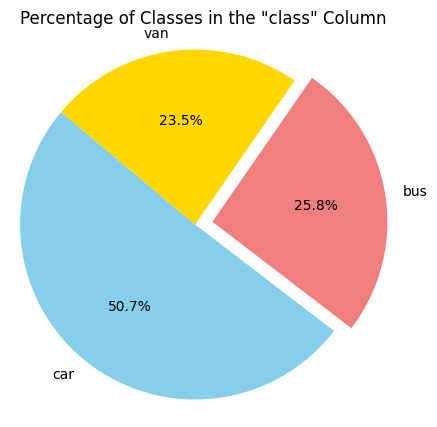

In [10]:
class_counts = data['class'].value_counts()
labels = class_counts.index
sizes = class_counts.values
explode = (0, 0.1, 0)  # Explode slice for better visualization

colors = ['skyblue', 'lightcoral', 'gold']

# Creates a pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode, colors=colors)
plt.title('Percentage of Classes in the "class" Column')
plt.axis('equal')
plt.show()

### 2.1 d - Check for duplicate rows in the data and impute with correct approach.

In [11]:
data.duplicated().sum()

0

The dataset is free of duplicacy.

### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:#DAA520;"> 2. Data Preparation

### 2.2 a - Split data into X and Y  [Train and Test optional].
##### -> You can fit your whole data to your model (model.fit(X,y)) Or you can split your data into train and test. It’s your choice.

In [12]:
X = data.drop(labels= "class" , axis = 1)
y = data["class"]

In [13]:
X.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183


In [14]:
y.head()

0    van
1    van
2    car
3    van
4    bus
Name: class, dtype: object

### 2.2 b - Standardize the Data

In [15]:
# Standardizing data using zscore
X_scaled = X.apply(zscore)

In [16]:
X_scaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.517682,0.059308,0.271910,1.309886,0.311542,-0.208583,0.137295,-0.223684,0.758332,-0.403165,-0.343931,0.285523,-0.327232,-0.072834,0.380475,-0.312208,0.183957
1,-0.325470,-0.624110,0.122821,-0.835616,-0.594175,0.094079,-0.600383,0.521478,-0.609882,-0.344578,-0.594494,-0.621727,-0.513811,-0.059367,0.539264,0.156401,0.013073,0.452977
2,1.254193,0.843908,1.520094,1.199837,0.548262,0.311542,1.147649,-1.143315,0.934909,0.689401,1.095585,1.107410,1.392295,0.074565,1.559428,-0.403783,-0.149568,0.049447
3,-0.082445,-0.624110,-0.004204,-0.296819,0.167449,0.094079,-0.751075,0.649538,-0.609882,-0.344578,-0.913377,-0.740782,-1.466865,-1.264758,-0.072834,-0.291746,1.639478,1.529056
4,-1.054545,-0.134771,-0.766353,1.080105,5.244946,9.444962,-0.600383,0.521478,-0.609882,-0.275646,1.669575,-0.650073,0.408498,7.306912,0.539264,-0.179709,-1.450692,-1.699181


We can see that data has been standardized.

### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:#DAA520;"> 3. Model Building

### 2.3 a - Train a base Classification model using SVM.

In [17]:
# Initialize the SVM classifier
svm_cl = SVC()

# Train the SVM model using the whole dataset
svm_cl.fit(X_scaled, y)

SVC()

### 2.3 b - Print Classification metrics for train data.

In [18]:
pred = svm_cl.predict(X_scaled)

# Print classification report for train data
print("• Classification Metrics for Train Data: \n")
print("  ",classification_report(y, pred), '\n')

conf_matrix = confusion_matrix(y, pred)
# Print the confusion matrix
print("• Confusion Matrix:\n")
print(conf_matrix,"\n")

• Classification Metrics for Train Data: 

                 precision    recall  f1-score   support

         bus       0.99      0.98      0.98       218
         car       0.99      0.98      0.99       429
         van       0.95      0.98      0.97       199

    accuracy                           0.98       846
   macro avg       0.98      0.98      0.98       846
weighted avg       0.98      0.98      0.98       846
 

• Confusion Matrix:

[[214   0   4]
 [  2 421   6]
 [  1   3 195]] 



### 2.3 c - Apply PCA on the data with 10 components.

In [19]:
pca = PCA(n_components=10)
pca.fit(X_scaled)

PCA(n_components=10)

### 2.3 d - Visualize Cumulative Variance Explained with Number of Components.

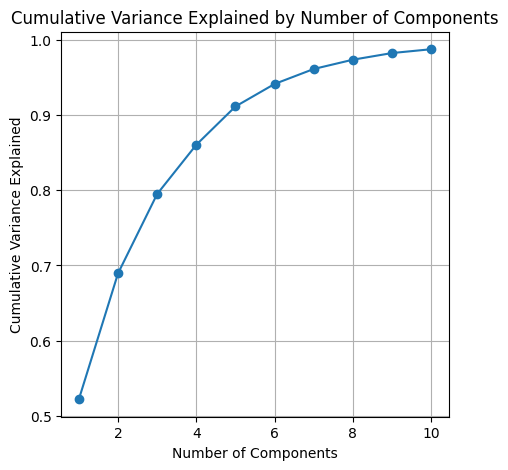

In [20]:
# Calculate cumulative variance explained
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative variance explained curve
plt.figure(figsize=(5, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Variance Explained by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

### 2.3 e - Draw a horizontal line on the above plot to highlight the threshold of 90%.

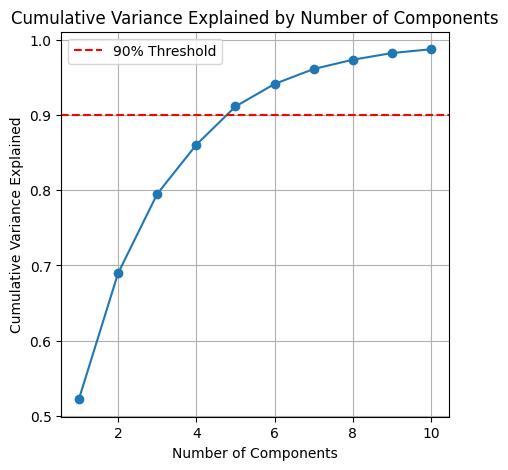

In [21]:
plt.figure(figsize=(5, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Threshold')
plt.title('Cumulative Variance Explained by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.legend()
plt.grid(True)
plt.show()

### 2.3 f - Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained.

In [22]:
# Determine the minimum number of components for 90% variance explained
min_components = np.argmax(cumulative_variance >= 0.9) + 1

# Apply PCA with the determined number of components
pca2 = PCA(n_components=min_components)
pca2.fit(X_scaled)

PCA(n_components=5)

In [23]:
Xpca2 = pca2.transform(X_scaled)

### 2.3 g - Train SVM model on components selected from above step.

In [24]:
# Initialize the SVM model
svm_cl2 = SVC()

# Fit the SVM model on the transformed data
svm_cl2.fit(Xpca2, y)

SVC()

### 2.3 h - Print Classification metrics for train data of above model and share insights.

In [25]:
pred_pca = svm_cl2.predict(Xpca2)

# Print classification report for train data
print("• Classification Metrics for Train Data: \n")
print("  ",classification_report(y, pred_pca), '\n')

conf_matrix = confusion_matrix(y, pred_pca) 
print("• Confusion Matrix:\n")
print(conf_matrix,"\n")

• Classification Metrics for Train Data: 

                 precision    recall  f1-score   support

         bus       0.86      0.68      0.76       218
         car       0.84      0.89      0.87       429
         van       0.70      0.76      0.73       199

    accuracy                           0.81       846
   macro avg       0.80      0.78      0.79       846
weighted avg       0.81      0.81      0.81       846
 

• Confusion Matrix:

[[149  39  30]
 [ 10 383  36]
 [ 14  33 152]] 



### Insights - 

#### 1. `Class-Specific Performance`:
* For the "bus" class, the model achieves a precision of 0.86, recall of 0.68, and an F1-score of 0.76. The "bus" class has lower recall, indicating that the model struggles to identify all instances of the "bus" class correctly. The 'bus' class has lower precision and recall compared to 'car', indicating that there might be some misclassification and the model could improve its performance for this class.
* For the "car" class, the model performs well with a precision of 0.84, recall of 0.89, and an F1-score of 0.87. The "car" class has good precision and recall, indicating a balanced performance.
* For the "van" class, the model has a precision of 0.70, recall of 0.76, and an F1-score of 0.73. The 'van' class shows reasonable performance, with precision and recall falling between those of 'bus' and 'car'.

#### 2. `Interpretation of Confusion Matrix`:
* The model seems to perform better at correctly classifying 'car' instances, as indicated by the high number of true positives for the 'car' class.
* The 'bus' and 'van' classes have relatively lower true positive counts, indicating some challenges in predicting these classes.
* The false positive counts suggest some confusion between the 'bus' and 'car' classes, as well as between the 'bus' and 'van' classes.
* The false negative counts also indicate some instances where the model struggled to identify certain instances correctly, such as 'bus' instances being incorrectly predicted as 'car' or 'van'.
* Overall, there is room for improvement, particularly in enhancing the model's ability to distinguish between the 'bus' and 'van' classes.

#### 3. `Overall Model Performance`:
The model's overall performance is reasonable, with an accuracy of 81%. However, there is room for improvement, particularly in enhancing the detection of the "bus" class.

### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:#DAA520;"> 4. Performance Improvement

### 2.4 a - Train another SVM on the components out of PCA. Tune the parameters to improve performance.

Let's do Hyper-parameter tuning by Grid-Search Technique.

In [26]:
# Initialize the SVM model
svm_model = SVC()

# Define the grid of hyperparameters to search over
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': [ 0.1, 1]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=10, n_jobs=-1)
grid_search.fit(Xpca2, y)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

### 2.4 b - Share best Parameters observed from above step.

In [27]:
# Get the best SVM model from grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


### 2.4 c - Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights.

We have got the best parameter combination so lets now check the performance of the model on train data (Whole data) using these parameters and print it's Classification metrics.

In [28]:
svm_best = SVC(C=10, gamma=0.1, kernel='rbf', probability=True)
svm_best.fit(Xpca2, y)

SVC(C=10, gamma=0.1, probability=True)

In [29]:
pred_svm = svm_best.predict(Xpca2)

# Print classification report for train data
print("• Classification Metrics for Train Data: \n")
print("  ",classification_report(y, pred_svm), '\n')

conf_matrix = confusion_matrix(y, pred_svm)
print("• Confusion Matrix:\n")
print(conf_matrix,"\n")

• Classification Metrics for Train Data: 

                 precision    recall  f1-score   support

         bus       0.88      0.86      0.87       218
         car       0.92      0.93      0.93       429
         van       0.85      0.83      0.84       199

    accuracy                           0.89       846
   macro avg       0.88      0.88      0.88       846
weighted avg       0.89      0.89      0.89       846
 

• Confusion Matrix:

[[188  21   9]
 [  8 401  20]
 [ 17  16 166]] 



#### Relative Performance Improvement and Insights:

* The SVM model trained on the original scaled data achieved the highest accuracy and performed exceptionally well likely due to having all the original features available and well-scaled.
* The PCA-based SVM model initially experienced a drop in performance due to dimensionality reduction, leading to loss of some information.
* However, the tuned SVM model on PCA-transformed data managed to recover and improve performance compared to the initial PCA-based model. This suggests that hyperparameter tuning and careful component selection can mitigate the loss of information caused by dimensionality reduction.
* Hyperparameter tuning significantly improved the model's ability to correctly classify instances, resulting in a more balanced and accurate model.

### 2.5 a - Explain pre-requisite/assumptions of PCA.

#### Prerequisites and Assumptions of PCA for the Dataset 'vehicle' :

1. `Linear Relationships`: PCA assumes that the relationships between the geometric features extracted from the vehicle silhouettes are linear. It aims to capture the linear correlations among these features.
2. `Mean-Centered Data`: Before applying PCA, it's recommended to center the features around their means. This helps in capturing the variance more accurately and aligning the data points in the feature space.
3. `Large Variance Represents Important Information`: PCA assumes that features with higher variance hold more valuable information about the differences between vehicle silhouettes. It seeks to retain principal components that explain the most variance in the data.
4. `Orthogonal Principal Components`: PCA generates orthogonal principal components. In the context of your dataset, this implies that the geometric features are uncorrelated in the new principal component space.
5. `Non-Zero Variance`: Principal components with non-zero variance contribute to capturing meaningful variation in the vehicle silhouettes. Principal components with near-zero variance represent directions with minimal variability and can be safely discarded.
6. `Data Distribution`: PCA assumes that the geometric features are distributed in an approximately elliptical shape in the original feature space. Any skewness or nonlinear patterns might impact the effectiveness of PCA.
7. `Data Size`: PCA can be applied to your dataset, which contains geometric features of vehicle silhouettes. While PCA is generally applicable to both small and large datasets, the dimensionality of your dataset will affect the interpretation and impact of the results.
8. `Eigenvalues and Eigenvectors`: PCA relies on the computation of eigenvalues and eigenvectors of the covariance matrix of the geometric features. This assumes that the covariance matrix is well-behaved and numeric stability is maintained during the computation.

### 2.5 b - Explain advantages and limitations of PCA.

####  `Advantages of PCA`:

* Dimensionality Reduction: Reduces the number of dimensions while retaining important information.
* Noise Reduction: Filters out noise and focuses on dominant patterns.
* Data Visualization: Simplifies high-dimensional data for visualization and understanding.
* Multicollinearity Resolution: Handles correlated features, improving stability.
* Model Complexity Reduction: Improves efficiency and reduces overfitting risk.
* Variable Interpretability: Principal components provide insight into feature contributions.

#### `Limitations of PCA`:

* Loss of Interpretability: Principal components may not directly correspond to original features.
* Assumption of Linearity: Assumes linear relationships, may not capture nonlinear patterns.
* Information Loss: Dimensionality reduction leads to loss of subtle patterns.
* Outliers Impact: Outliers can disproportionately influence results.
* Scaling Sensitivity: Sensitive to feature scales, potentially skewing results.
* Curse of Dimensionality: Challenges in high-dimensional data, computational complexity.
* Non-Gaussian Data: Assumes Gaussian distribution, may not work well for non-Gaussian data.
* Overfitting Risk: Selecting too few or too many components can lead to underfitting or overfitting.


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#000000;">***********************************************************************************************************************

# <center><span style="font-family: Arial; font-weight:bold;font-size:2.4em;color:#1F497D;"> End Of Project